# Gathering Data
## 1.Twitter Archive File 
## 2. Image predictions File
## 3.Twittwer API

In [105]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# load twitter-archive-enhanced file
twt_archive = pd.read_csv('twitter-archive-enhanced.csv')
twt_archive 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None


In [107]:
#explore twitter-archive-enhanced info
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [108]:
#load image-predictions.tsv file
image_pred=pd.read_csv('image-predictions.tsv',sep='\t')
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [109]:
#Explore image predictions info
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [110]:
# load tweet_json.txt' file as json object 
with open ('tweet_json.txt') as json_file:
    for json_obj in json_file:
        json_tweet = json.loads(json_obj)
        break

In [111]:
#Explore tweet json object 
json_tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [112]:
#Explore user field in tweet json object 
json_tweet['user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [113]:
#load tweet-json - Copy.json as json file
df_tweet_json=pd.read_json('tweet-json - Copy.json',lines=True)
df_tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89242063948687...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'med...",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89217741319462...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'me...",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89181517537179...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'me...",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89168955272479...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'med...",42908,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], ...","{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'me...",41048,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], ...","{'media': [{'id': 891087942176911360, 'id_str': '891087942176911360', 'indices': [139, 162], 'me...",20562,False,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Zr4hWfAs1H',...","{'media': [{'id': 89097

In [114]:
#Explore tweet_json info
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

# Assessing Data
## Explore and assess twitter-archive-enhanced 

In [115]:
#check basic statistics twitter-archive-enhanced
twt_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [116]:
# chech dupicates
twt_archive[twt_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [117]:
# check null values
twt_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [118]:
#check duplicates in tweet_id
twt_archive.tweet_id.duplicated().sum()

0

In [119]:
twt_archive.expanded_urls.duplicated().sum()

137

In [120]:
#check if null expanded_urls in tweet archive  exist in image_prediction dataframe
twt_archive_ids=twt_archive[twt_archive.expanded_urls.isnull()].tweet_id
image_pred[image_pred.tweet_id.isin(twt_archive_ids)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [121]:
#check dogs names
twt_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Scout          6
Leo            6
Milo           6
Jax            6
Rusty          6
Dave           6
Stanley        6
Bella          6
Koda           6
Oscar          6
Jack           6
Bentley        5
            ... 
Travis         1
Billy          1
Perry          1
Flurpson       1
Lugan          1
Sobe           1
Randall        1
Jareld         1
Mitch          1
Storkson       1
Monkey         1
Oreo           1
Craig          1
Akumi          1
Biden          1
Kara           1
Jazz           1
Bayley         1
Ginger         1
Sage           1
Daniel         1
Rupert         1
Pepper         1
his            1
Jett           1
Georgie        1
Scruffers      1
Boston        

In [122]:
#check counts of errors in dogs names
df_names=twt_archive[twt_archive.name.isin(['a','an','the','None'])].name
df_names.value_counts()

None    745
a        55
the       8
an        7
Name: name, dtype: int64

In [123]:
#Explore rating_numerator column
twt_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [124]:
#Explore rating_denominator column
twt_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [125]:
# Explore denominator which not eqial 10
twt_archive[twt_archive['rating_denominator'].isin([50,20,80,11,0,2,7,15,16,40,70,90,110,120,130,150,170])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/st...",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clickin...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search ...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/st...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our se...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/st...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at onc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [126]:
#check what is doggo , pupper, puppo,floofer columns
print(twt_archive.doggo.value_counts()), print(twt_archive.pupper.value_counts()), print(twt_archive.puppo.value_counts()), print(twt_archive.floofer.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64


(None, None, None, None)

## Explore and assess image-predictions

In [127]:
#Explore sample
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False
999,708479650088034305,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1,Shih-Tzu,0.218479,True,Lhasa,0.201966,True,Norfolk_terrier,0.165225,True
190,669393256313184256,https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg,1,cocker_spaniel,0.359843,True,Blenheim_spaniel,0.139519,True,toy_poodle,0.132746,True
1671,813096984823349248,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,Great_Dane,0.128056,True,Boston_bull,0.117003,True,kelpie,0.086964,True
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
365,672898206762672129,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,0.043763,True
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True


In [128]:
#check basic statistics in image predictions
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [129]:
#check duplicates
image_pred.duplicated().sum()

0

In [130]:
image_pred.tweet_id.duplicated().sum()

0

In [131]:
image_pred.jpg_url.duplicated().sum()

66

In [132]:
#check duplicates in images
image_pred[image_pred.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [133]:
image_pred[image_pred['jpg_url'] == 'https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


In [134]:
# assure that duplicated jpg_url in image_preditction is the retweet tweets in tweets archive and begin with RT
twt_archive[twt_archive['tweet_id'].isin ([675354435921575936, 752309394570878976])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,"https://twitter.com/dog_rates/status/675354435921575936/video/1,https://twitter.com/dog_rates/st...",13,10,None,None,None,None,None
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435921575936/video/1,13,10,None,None,None,None,None


In [135]:
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [136]:
## Explore and assess JSON twitt
df_tweet_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [137]:
df_tweet_json.id.duplicated().sum()

0

In [138]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## Quality 
### `twitter-archive-enhanced.csv`

1-Invalid data:  source column has html tags

2-Invalid data: Timestamp is datetime datatype

3-missing data: /2278/ NAN values in (in_reply_to_status_id, in_reply_to_user_id) columns and /2175/ NAN values in (retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp) cloumns.

4-Unnecessary data (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id)columns

5- Invalid data:/59/ NAN values in (expanded_urls) column.

6- Unnecessary data :  There are 137 duplicated values and they are retweeted tweets.

7-invalid data: there are errors in dogs name (745 'none',55 'a',7 'an' ,8 'the')

8-Inaccurate data: denominator values(50,20,80,11,0,2,7,15,16,40,70,90,110,120,130,150,170) in rating_denominator column are not equal to 10

### `image-predictions.tsv`

9- Unnecessary data:  66 duplicates jpg_url.

### `Twitter API`

10-Missing data: (contributors, coordinates, geo) columns are empty, place columns has one not null value.

11-Invalid data:  source column has html tags

12-column id doesn’t express tweet_id


### Tidiness
### `twitter-archive-enhanced.csv`
1-columns (Doggo, Floofer, Pupper, Puppo) are type of dog.
### `image-predictions.tsv`
2- image-predictions.tsv , twitter-archive-enhanced, and tweet JSON , they are one table.


# Cleaning Data
## Quality 
### `twitter-archive-enhanced.csv`
1- Delete  html tags in source column 

2- Convert Timestamp type to datatime

3- drop (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id)columns

4-drop null values in expanded_urls

5-drop duplicated values in expanded_urls

6- replace dog names ('none', 'a', 'an' , 'the') with NAN

7- correct error values in rating_denominator if exist:
    -	replace 24/7 with nan
    -	replace 4/20 with 13/10
    -	replace 1/2  with 9 10
    -	replace 7/11 with 10/10
    -	replace 50/50 with 11/10


### `image-predictions.tsv`

8- delete 66 duplicates jpg_url.

### `Twitter API`

1- delete(contributors, coordinates, geo, place) columns

2- Delete  html tags in source column 

3-rename id = tweet_id

### Tidiness
### `twitter-archive-enhanced.csv`

1- make one column type instead of (Doggo, Floofer, Pupper, Puppo) columns

### `image-predictions.tsv`

2- Merge image-predictions with twitter-archive-enhanced, and tweet JSON in one table.

In [139]:
# cleaned dataframes
twt_archive_clean = twt_archive.copy()
image_pred_clean = image_pred.copy()
df_tweet_json_clean = df_tweet_json.copy()

In [140]:
twt_archive_clean['timestamp']=twt_archive_clean['timestamp'].astype('datetime64[ns]') 

In [141]:
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [142]:
# fix source column in tweet_archive_enhanced
from bs4 import BeautifulSoup
#Abstract source text in HTML
df_source=[]
for item in twt_archive_clean.source:
    soup=BeautifulSoup(item,'lxml')
    cut_source=soup.find('a').string
    df_source.append(cut_source)

twt_archive_clean.source=df_source

In [143]:
twt_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [144]:
#Delete (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id)columns
twt_archive_clean=twt_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)

In [145]:
twt_archive_clean.dropna(subset=['expanded_urls'],inplace=True)

In [146]:
twt_archive_clean.drop_duplicates(subset=['expanded_urls'],inplace=True)

In [147]:
twt_archive_clean.expanded_urls.duplicated().sum()

0

In [148]:
twt_archive_clean.expanded_urls.isnull().sum()

0

In [149]:
twt_archive_clean[twt_archive_clean.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [150]:
# replace 'a', 'an', 'the' , 'None' in name column with  NAN
twt_archive_clean.name =twt_archive_clean.name.replace(['a','an','the','None'],np.nan)

In [151]:
# chech errors
pd.set_option('display.max_colwidth', 100)
twt_archive_clean[twt_archive_clean['rating_denominator'].isin([50,20,80,11,0,2,7,15,16,40,70,90,110,120,130,150,170])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/st...",84,70,NaN,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clickin...,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06,Twitter for iPhone,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search ...","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/st...",9,11,NaN,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at onc...,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 ht...,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.c...,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,NaN,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 4...",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,NaN,None,None,None,None


In [152]:
# replace 24/7 with nan
twt_archive_clean['rating_numerator'].replace(24,np.nan)  
twt_archive_clean['rating_denominator'].replace(7,np.nan)  
# replace 4/20 with 13/10
twt_archive_clean['rating_numerator'].replace(4,13)  
twt_archive_clean['rating_denominator'].replace(20,10)
# replace 1/2  with 9 10
twt_archive_clean['rating_numerator'].replace(1,9)
twt_archive_clean['rating_denominator'].replace(2,10)                
# replace 7/11 with 10/10
twt_archive_clean['rating_numerator'].replace(7,10)
twt_archive_clean['rating_denominator'].replace(11,10)  
# replace 50/50 with 11/10
twt_archive_clean['rating_numerator'].replace(50,11)
twt_archive_clean['rating_denominator'].replace(50,10)  

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
2325    10
2326    10
2327    10
2328    10
2329    10
2330    10
2331    10
2332    10
2333    10
2334    10
2335     2
2336    10
2337    10
2339    10
2340    10
2341    10
2342    10
2343    10
2344    10
2345    10
2346    10
2347    10
2348    10
2349    10
2350    10
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2218, dtype: int64

In [153]:
#delete 66 duplicates jpg_url.
image_pred_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

In [154]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [155]:
# fix source column in tweet_JSON
from bs4 import BeautifulSoup
#Abstract source text in HTML
df_source=[]
for item in df_tweet_json_clean.source:
    soup=BeautifulSoup(item,'lxml')
    cut_source=soup.find('a').string
    df_source.append(cut_source)

df_tweet_json_clean.source=df_source

In [156]:
#check
df_tweet_json_clean.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [157]:
#merge colmuns Doggo', 'Floofer', 'Pupper', 'Puppo' to check if there more than these 4 types
twt_archive_clean['stage']=twt_archive_clean.text.str.lower().str.findall('(doggo|pupper|puppo|floof)')
twt_archive_clean['stage'] = twt_archive_clean['stage'].apply(lambda x: ','.join(set(x)))
twt_archive_clean['stage']=twt_archive_clean['stage'].replace('',np.nan)
twt_archive_clean['stage'] .value_counts()

pupper          257
doggo            83
floof            37
puppo            30
pupper,doggo     12
floof,doggo       2
puppo,doggo       2
floof,pupper      1
Name: stage, dtype: int64

In [158]:
#delete Doggo', 'Floofer', 'Pupper', 'Puppo
twt_archive_clean.drop(twt_archive_clean[['doggo','puppo','pupper','floofer']],axis=1,inplace=True)
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2218 non-null int64
timestamp             2218 non-null datetime64[ns]
source                2218 non-null object
text                  2218 non-null object
expanded_urls         2218 non-null object
rating_numerator      2218 non-null int64
rating_denominator    2218 non-null int64
name                  1481 non-null object
stage                 424 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 173.3+ KB


In [159]:
#drop null values columns
df_tweet_json_clean.drop(df_tweet_json_clean[['contributors', 'coordinates', 'geo', 'place']],axis=1,inplace=True)

In [160]:
# renamr id to tweet_id
df_tweet_json_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [161]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2

In [162]:
# mergeing
df_clean = twt_archive_clean.merge(image_pred_clean,how='inner',on='tweet_id').merge(df_tweet_json_clean,how='left',on='tweet_id')


In [163]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1930
Data columns (total 46 columns):
tweet_id                         1931 non-null int64
timestamp                        1931 non-null datetime64[ns]
source_x                         1931 non-null object
text                             1931 non-null object
expanded_urls                    1931 non-null object
rating_numerator                 1931 non-null int64
rating_denominator               1931 non-null int64
name                             1320 non-null object
stage                            354 non-null object
jpg_url                          1931 non-null object
img_num                          1931 non-null int64
p1                               1931 non-null object
p1_conf                          1931 non-null float64
p1_dog                           1931 non-null bool
p2                               1931 non-null object
p2_conf                          1931 non-null float64
p2_dog                    

In [164]:
#save data
df_clean.to_csv('twitter_archive_master.csv', index=False)

### Data Analysis

In [165]:
df=pd.read_csv('twitter_archive_master.csv')

In [166]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count
count,1.931000e+03,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1.931000e+03,1930.000000,1.930000e+03,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,1930.0,1930.0,0.0,0.0,0.0,1930.000000
mean,7.348495e+17,12.282755,10.548938,1.199379,0.592590,0.133943,6.053026e-02,8278.796891,7.348308e+17,6.978112e+17,6.978112e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,2526.144041
std,6.740943e+16,42.143805,7.438596,0.553949,0.272709,0.100040,5.097636e-02,11576.341373,6.742187e+16,4.359384e+16,4.359384e+16,0.000000e+00,0.000000e+00,0.0,0.0,NaN,NaN,NaN,4301.731853
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,0.000010,2.160900e-07,0.000000,6.660209e+17,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,16.000000
25%,6.755269e+17,10.000000,10.000000,1.000000,0.360009,0.053886,1.649005e-02,1814.000000,6.755247e+17,6.732411e+17,6.732411e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,602.000000
50%,7.076109e+17,11.000000,10.000000,1.000000,0.587830,0.117508,4.970020e-02,3842.500000,7.075158e+17,6.757073e+17,6.757073e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,1282.000000
75%,7.859003e+17,12.000000,10.000000,1.000000,0.843855,0.194229,9.158675e-02,10335.000000,7.859140e+17,7.031489e+17,7.031489e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,2913.750000
max,8.924206e+17,1776.000000,170.000000,4.000000,0.999984,0.488014,2.734190e-01,132810.000000,8.924206e+17,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,79515.000000


Text(0.5,0,'corresponding image number to reliable prediction result ')

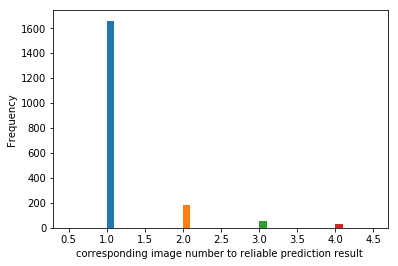

In [167]:
# most mg_num match reliable prediction result
df_type=df.groupby('img_num').img_num
df_type.plot(kind='hist')
plt.xlabel('corresponding image number to reliable prediction result ')

In [168]:
# breed of dog  that   is most popular

df_breeds=df[['p1','p1_dog','p2','p2_dog','p3','p3_dog']]


In [169]:
# breed of dog  that   is most popular
breeds=[]
for e in df_breeds.index:
    if df_breeds.p1_dog.loc[e]==True:
        breeds.append(df_breeds.p1.loc[e])
    elif df_breeds.p2_dog.loc[e]==True:
        breeds.append(df_breeds.p2.loc[e])
    elif df_breeds.p3_dog.loc[e]==True:
        breeds.append(df_breeds.p3.loc[e])
    else:
        breeds.append(np.nan)
df_breeds['breed']=breeds  
df_breeds['breed'].dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [170]:
# count of each dog breed in the dataset
df_plot=df_breeds['breed'].value_counts()
df_plot

golden_retriever                  150
Labrador_retriever                103
Pembroke                           92
Chihuahua                          89
pug                                63
toy_poodle                         48
chow                               47
Samoyed                            40
Pomeranian                         39
malamute                           32
cocker_spaniel                     29
Chesapeake_Bay_retriever           28
miniature_pinscher                 25
French_bulldog                     24
German_shepherd                    21
Siberian_husky                     20
beagle                             20
Staffordshire_bullterrier          20
Rottweiler                         19
Shetland_sheepdog                  19
Cardigan                           19
Maltese_dog                        19
Shih-Tzu                           19
Eskimo_dog                         18
kuvasz                             18
Lakeland_terrier                   18
Italian_grey

Text(0.5,1,'Top ten dogs breed in first prediction')

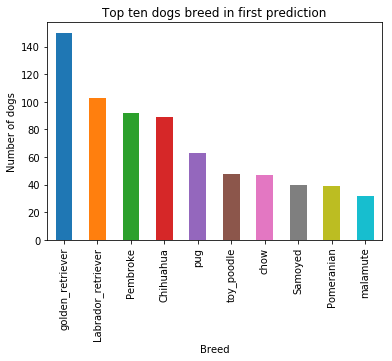

In [171]:
# plot top ten dog breed
df_plot[:10].plot(kind = 'bar')
plt.xlabel('Breed')
plt.ylabel('Number of dogs')
plt.title('Top ten dogs breed in first prediction')

In [172]:
# most appeared dog stage
df.stage.value_counts()

pupper          220
doggo            63
floof            34
puppo            24
pupper,doggo      9
puppo,doggo       2
floof,pupper      1
floof,doggo       1
Name: stage, dtype: int64

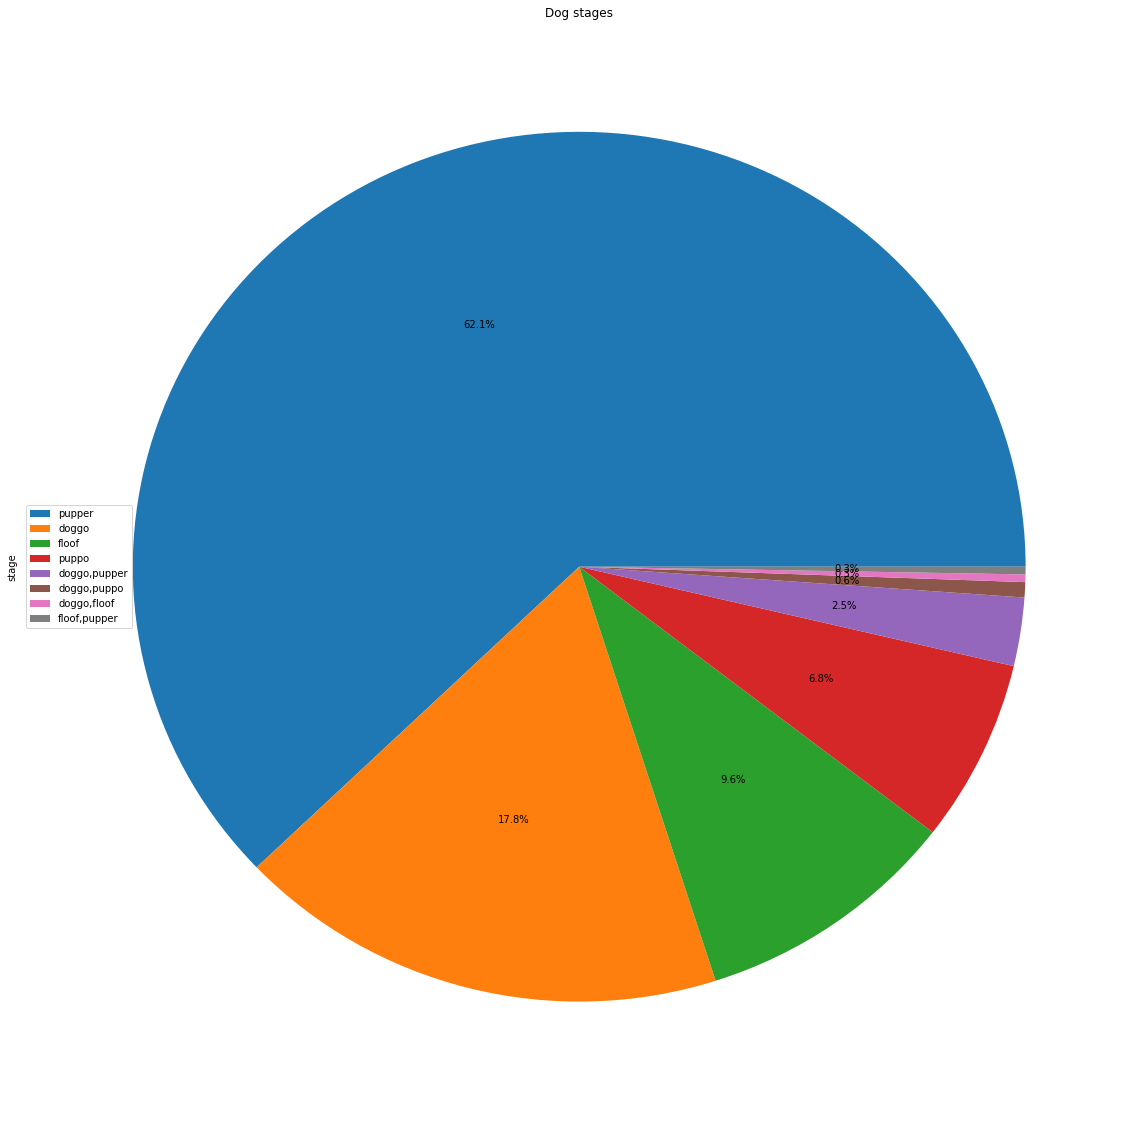

In [173]:
#-what is the most popular dog stage?
mylabels=['pupper','doggo','floof','puppo','doggo,pupper','doggo,puppo','doggo,floof','floof,pupper']
df.stage.value_counts().plot.pie(labels= None,autopct='%1.1f%%',figsize=(20,20))
plt.title('Dog stages')
plt.legend(mylabels, loc=6)


In [174]:
#max dog favourite count
df[df.favorite_count==df.favorite_count.max()]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user
297,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://...,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,0.0,NaN,NaN,NaN,48265.0,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."


In [175]:
# min dog favourite count
df[df.favorite_count==df.favorite_count.min()]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user
64,877611172832227328,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/...,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/...",14,10,NaN,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,...,0.0,NaN,NaN,NaN,83.0,False,"{'created_at': 'Mon Jun 19 17:14:49 +0000 2017', 'id': 876850772322988033, 'id_str': '8768507723...",Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
103,867072653475098625,2017-05-23 17:40:04,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG,"https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaele...",13,10,NaN,NaN,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,...,0.0,NaN,NaN,NaN,135.0,False,"{'created_at': 'Thu May 18 01:17:25 +0000 2017', 'id': 865013420445368320, 'id_str': '8650134204...",Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
123,860924035999428608,2017-05-06 18:27:40,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,"https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/st...",13,10,NaN,NaN,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,...,0.0,NaN,NaN,NaN,882.0,False,"{'created_at': 'Sat May 06 17:49:42 +0000 2017', 'id': 860914485250469888, 'id_str': '8609144852...",Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
158,851861385021730816,2017-04-11 18:15:55,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rT...,"https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,https://twitter.com/eddie_coe9...",10,10,NaN,NaN,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,...,0.0,NaN,NaN,NaN,23.0,False,"{'created_at': 'Sat Apr 01 21:42:03 +0000 2017', 'id': 848289382176100353, 'id_str': '8482893821...",Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
173,847971574464610304,2017-04-01 00:39:12,Twitter for iPhone,RT @basic_vacek_: I love my new mug easy 13/10 @dog_rates https://t.co/0bYtoL7Wwt,"https://twitter.com/basic_vacek_/status/847971000004354048/photo/1,https://twitter.com/basic_vac...",13,10,NaN,NaN,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,...,0.0,NaN,NaN,NaN,482.0,False,"{'created_at': 'Sat Apr 01 00:36:55 +0000 2017', 'id': 847971000004354048, 'id_str': '8479710000...",Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
206,839290600511926273,2017-03-08 01:44:07,Twitter for iPhone,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://...,"https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmar...",10,10,NaN,pupper,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,...,0.0,NaN,NaN,NaN,158.0,False,"{'created_at': 'Wed Mar 08 01:41:24 +0000 2017', 'id': 839289919298224128, 'id_str': '8392899192...",Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."
209,838916489579200512,2017-03-07 00:57:32,Twitter for iPhone,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status...",15,10,N

In [176]:
# most used names
df.name.value_counts()

Charlie      10
Lucy         10
Tucker        9
Penny         9
Cooper        9
Oliver        9
Sadie         8
Daisy         7
Toby          7
Winston       7
Jax           6
Lola          6
Stanley       6
Bella         6
Koda          6
Scout         5
Oscar         5
Rusty         5
Milo          5
Bailey        5
Bo            5
Dave          5
Louis         5
Chester       5
one           4
Archie        4
Cassie        4
Bear          4
Winnie        4
Maggie        4
             ..
Augie         1
Petrick       1
Stephanus     1
Sky           1
Rizzo         1
Jett          1
Pepper        1
Rontu         1
Craig         1
Bruiser       1
Darby         1
Keurig        1
Jay           1
O             1
Stephan       1
Rizzy         1
Monkey        1
Oreo          1
Akumi         1
Rupert        1
Davey         1
Biden         1
Rubio         1
Kara          1
Jazz          1
Bayley        1
Ginger        1
Sage          1
Daniel        1
Birf          1
Name: name, Length: 903,

In [177]:
#max dog retweeted count
df[df.retweet_count==df.retweet_count.max()]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user
734,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) http...,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,...,0.0,NaN,NaN,NaN,79515.0,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r..."


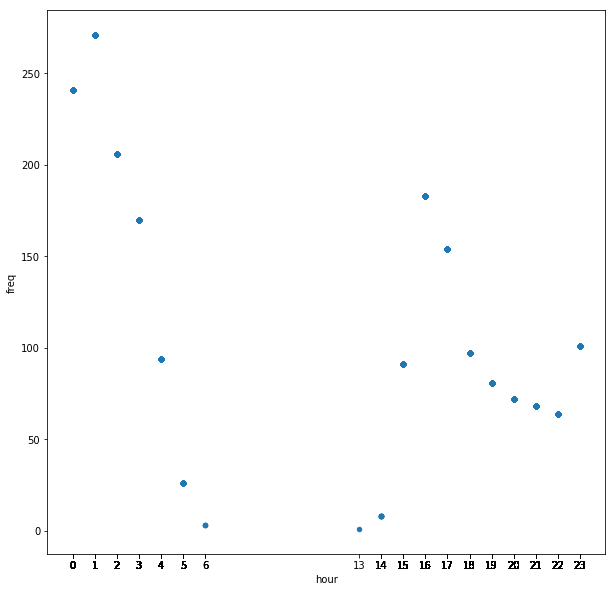

In [208]:
# the rush  hour that people tweet 
df['hour']=pd.DatetimeIndex(df['timestamp']).hour
df['freq'] = df.groupby('hour')['hour'].transform('count')
df.plot(kind='scatter', x='hour',y='freq',figsize=(10,10))
plt.xticks(df['hour']);